In [151]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.reload_library()
plt.style.use(["science"])

## Example with sample data

In [19]:
df=pd.read_csv("data/2021-05-08-22-19_chronograf_data.csv")[["_time", "_value"]]
df["elapsed"] = (pd.to_datetime(df["_time"].values) - pd.to_datetime(df["_time"][0])).total_seconds()
df

,_time,_value,elapsed
0,2021-05-08T20:18:30.694784806Z,99.000000,0.000000
1,2021-05-08T20:18:31.694898846Z,99.000000,1.000114
2,2021-05-08T20:18:32.69442009Z,99.000000,1.999635
3,2021-05-08T20:18:33.694904182Z,99.000000,3.000119
4,2021-05-08T20:18:34.694494751Z,99.000000,3.999710
...,...,...,...
3590,2021-05-08T21:18:25.892516573Z,0.813085,3595.197732
3591,2021-05-08T21:18:26.892965209Z,0.531123,3596.198180
3592,2021-05-08T21:18:27.892165946Z,0.531123,3597.197381
3593,2021-05-08T21:18:28.892106784Z,0.658880,3598.197322


In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 300

plt.figure()
plt.plot(df["elapsed"].values, df["_value"].values)
plt.xlabel("Time (seconds)")
plt.ylabel("PID Output (seconds)")

NameError: name 'df' is not defined

<Figure size 3000x1500 with 0 Axes>

# Load Shapes

## Flash Crowd

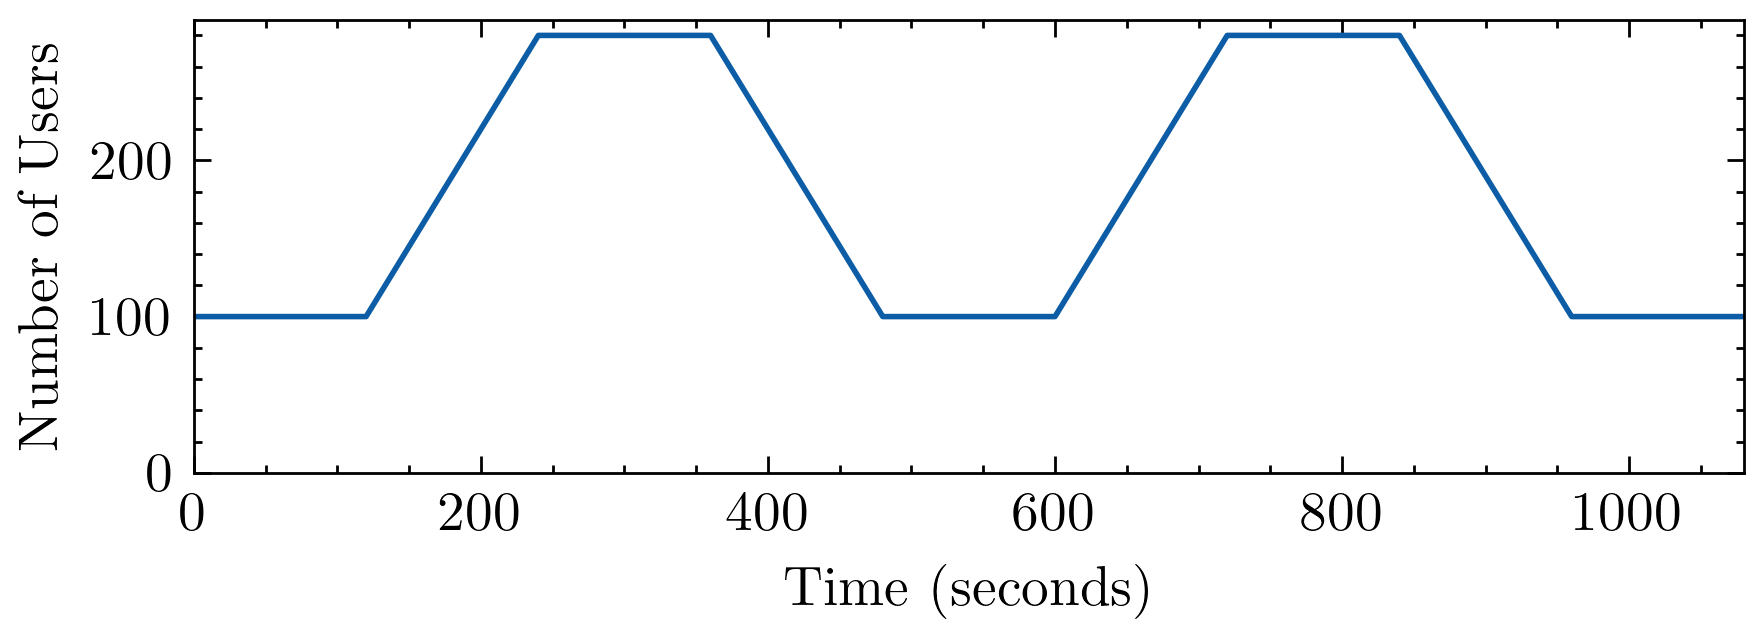

In [137]:
plt.rcParams['figure.figsize'] = [5, 1.5]
plt.rcParams['figure.dpi'] = 400

plt.figure()
plt.plot([0, 120, 240, 360, 480, 600, 720, 840, 960, 1080], [100, 100, 280, 280, 100, 100, 280, 280, 100, 100])
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Users")

plt.xlim([0, 1080])
plt.ylim([0, 290])
plt.savefig("../out/flash_crowd.pdf")

## Flash Crowd

# Saturation Experiments

## Finding the saturation when dimming is disabled

In [70]:
df=pd.read_csv("data/saturation_dimming_disabled_p95_2021-05-09-21-45_chronograf_data.csv")[["_time", "_value"]]
df["elapsed"] = (pd.to_datetime(df["_time"].values) - pd.to_datetime(df["_time"][0])).total_seconds()

# Clean up spikes at end of run
for elapsed_with_zero_value in df.loc[df["_value"] == 0]["elapsed"].values:
    df.drop(df.loc[(df["elapsed"] >= elapsed_with_zero_value - 15) & (df["elapsed"] <= elapsed_with_zero_value)].index, inplace=True)
    
df.head()

,_time,_value,elapsed
0,2021-05-09T16:10:58.839973549Z,0.174222,0.000000
1,2021-05-09T16:10:59.839940444Z,0.210537,0.999967
2,2021-05-09T16:11:00.839448659Z,0.208734,1.999475
3,2021-05-09T16:11:01.840023331Z,0.210044,3.000050
4,2021-05-09T16:11:02.83984928Z,0.210044,3.999876


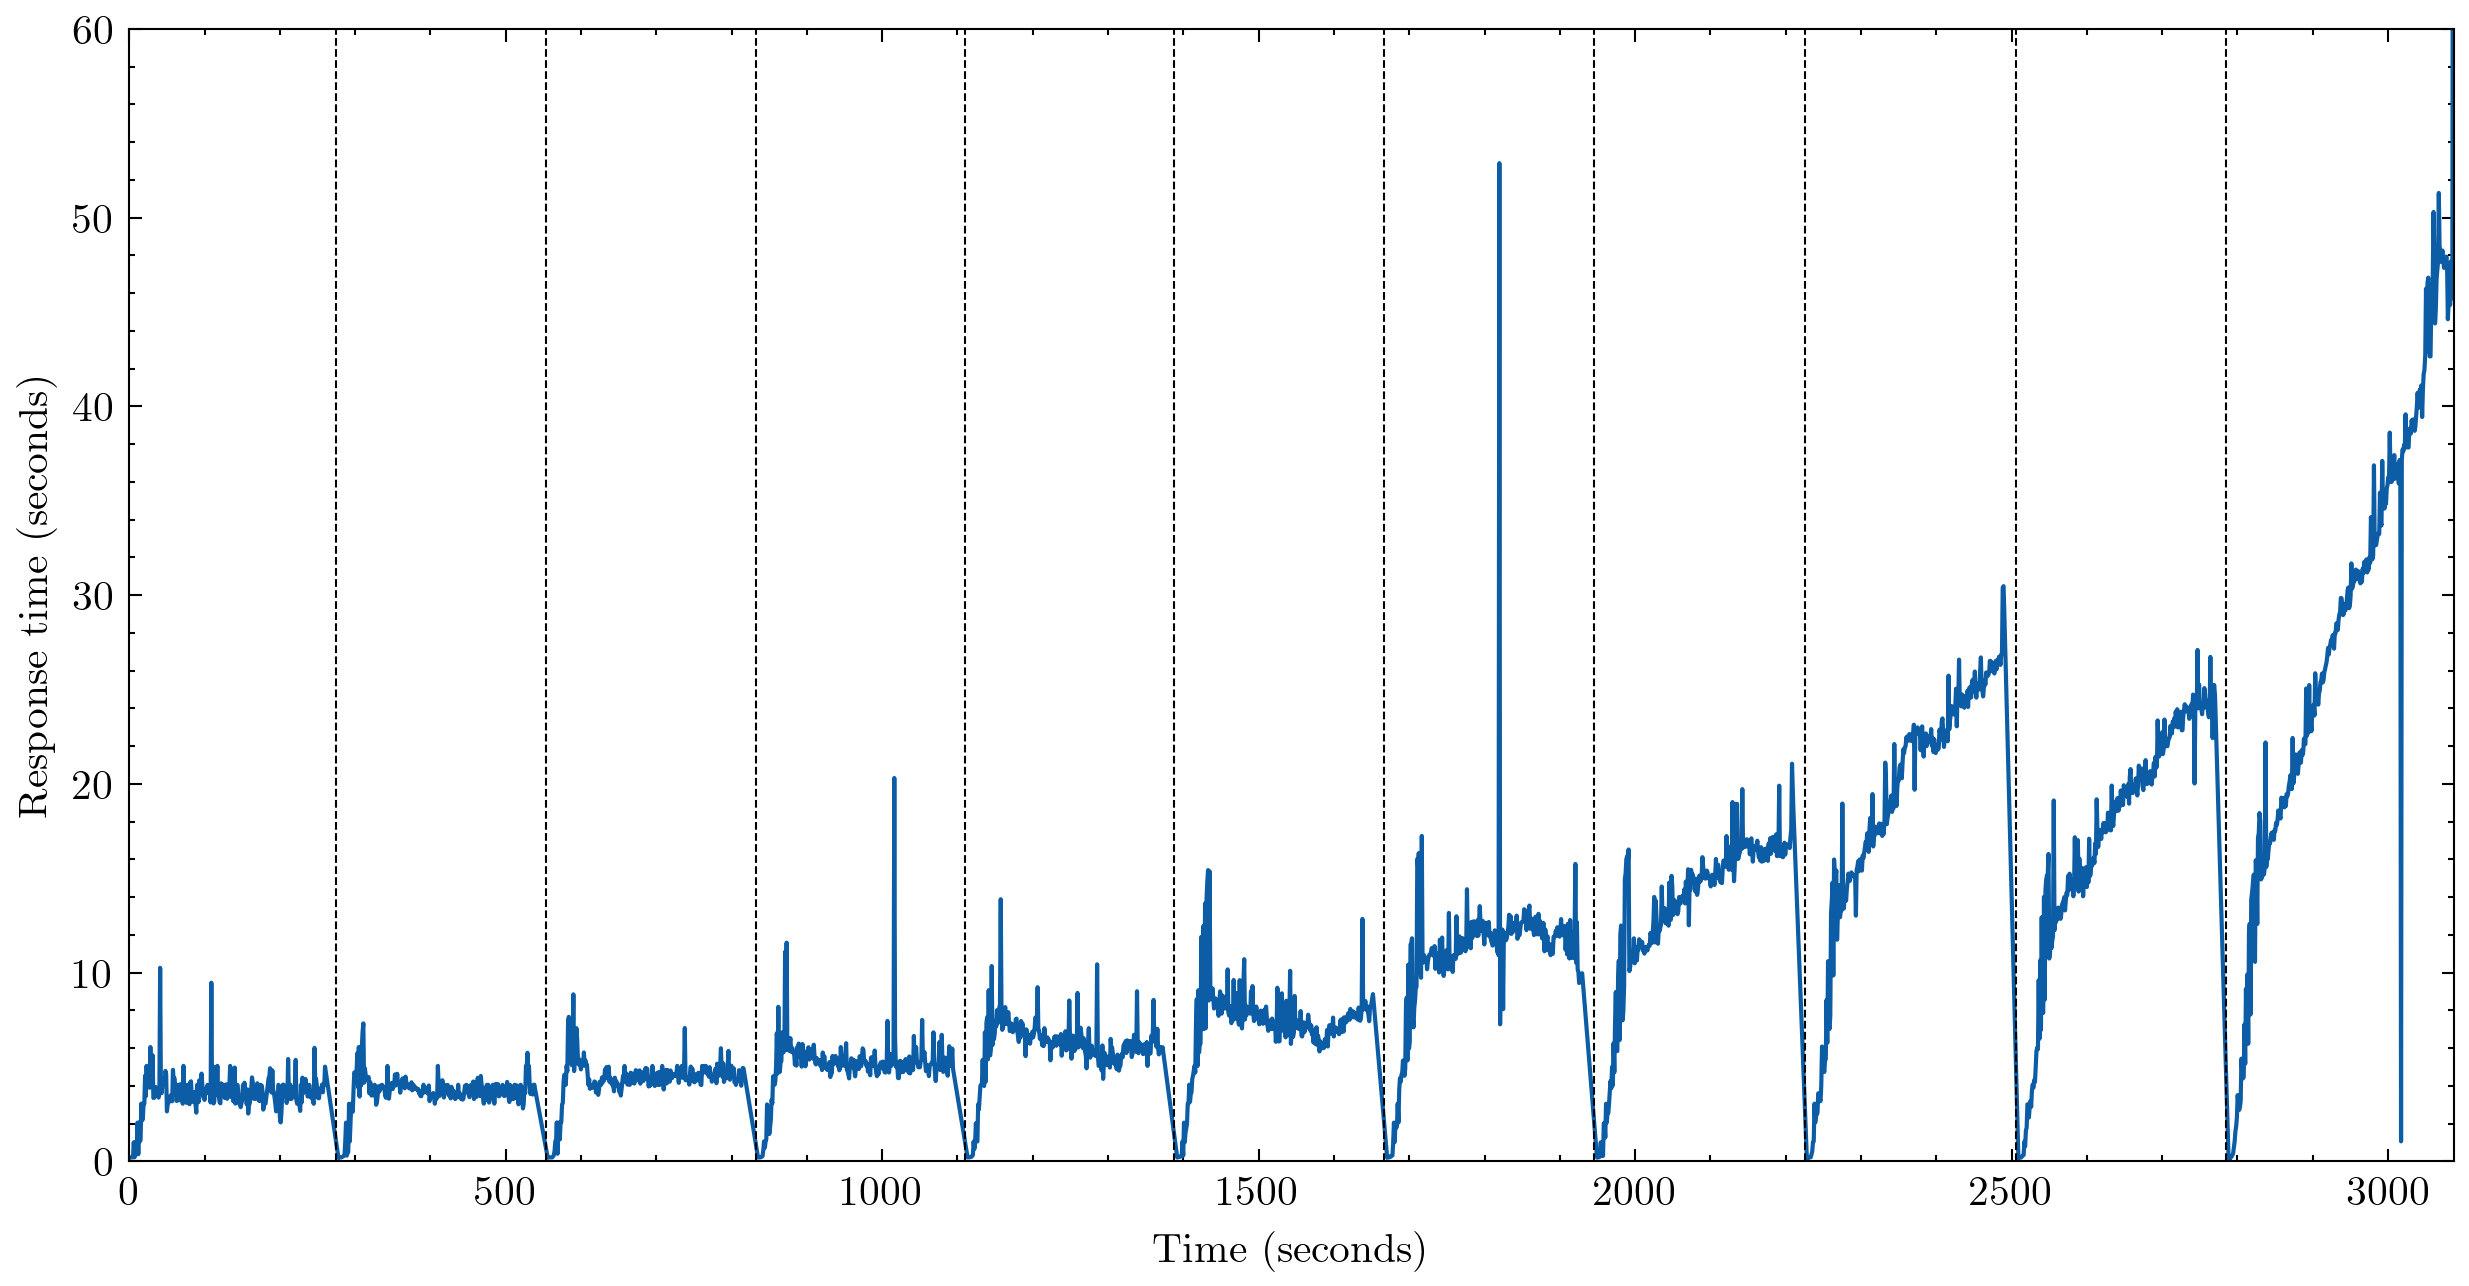

In [71]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 300

plt.figure()
plt.plot(df["elapsed"].values, df["_value"].values)

plt.xlabel("Time (seconds)")
plt.ylabel("Response time (seconds)")

plt.xlim([0, 3088])
plt.ylim([0, 60])

xposition = [275, 553, 832, 1110, 1388, 1667, 1946, 2225, 2506, 2785]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=0.5)
plt.savefig("../out/dimming_disabled_saturation.pdf")

## Finding the saturation when dimming is enabled

In [93]:
df=pd.read_csv("data/saturation_dimming_enabled_p95_2021-05-10-10-31_chronograf_data.csv")[["_time", "_value"]]
df["elapsed"] = (pd.to_datetime(df["_time"].values) - pd.to_datetime(df["_time"][0])).total_seconds()

# Clean up spikes at end of run
for elapsed_with_zero_value in df.loc[df["_value"] == 0]["elapsed"].values:
    df.drop(df.loc[(df["elapsed"] >= elapsed_with_zero_value - 15) & (df["elapsed"] <= elapsed_with_zero_value)].index, inplace=True)

df.tail()

,_time,_value,elapsed
3601,2021-05-09T21:39:18.214283212Z,3.214504,3617.824673
3602,2021-05-09T21:39:19.214097471Z,2.051742,3618.824487
3603,2021-05-09T21:39:20.214552465Z,6.240665,3619.824942
3604,2021-05-09T21:39:21.342086783Z,10.264084,3620.952476
3605,2021-05-09T21:39:22.342124906Z,11.234368,3621.952515


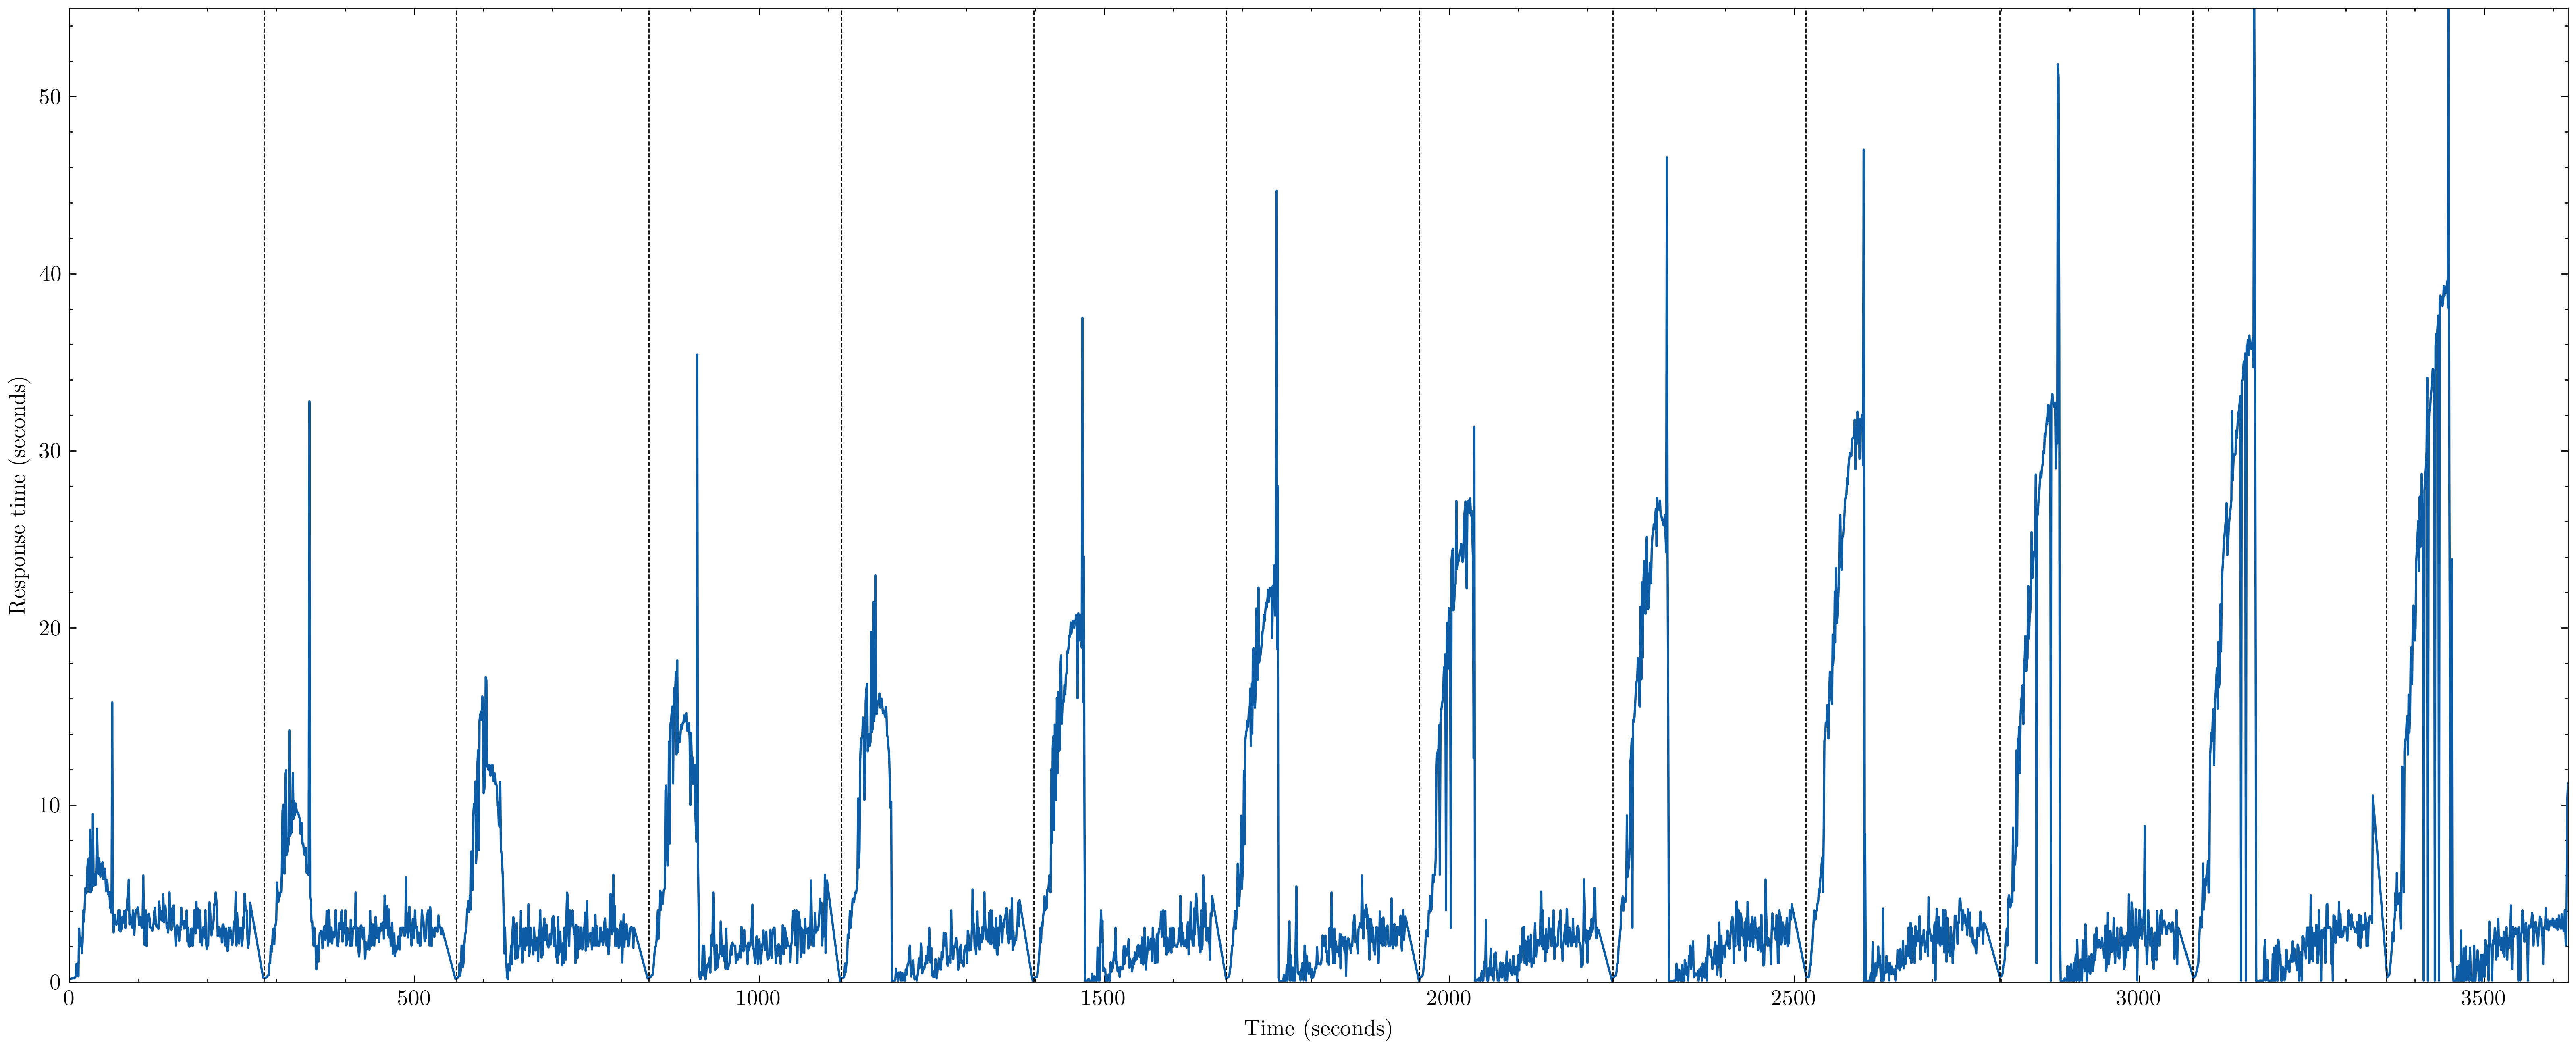

In [96]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 400

plt.figure()
plt.plot(df["elapsed"].values, df["_value"].values)

plt.xlabel("Time (seconds)")
plt.ylabel("Response time (seconds)")

plt.xlim([0, 3622])
plt.ylim([0, 55])

xposition = [282, 561, 840, 1119, 1398, 1677, 1957, 2237, 2517, 2798, 3078, 3359]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--', linewidth=0.5)
plt.savefig("../out/dimming_enabled_saturation.pdf")

# Evaluation Experiments

## Baseline Dimming: Adaptive Control Behaviour

### Constant Load, Dimmer On

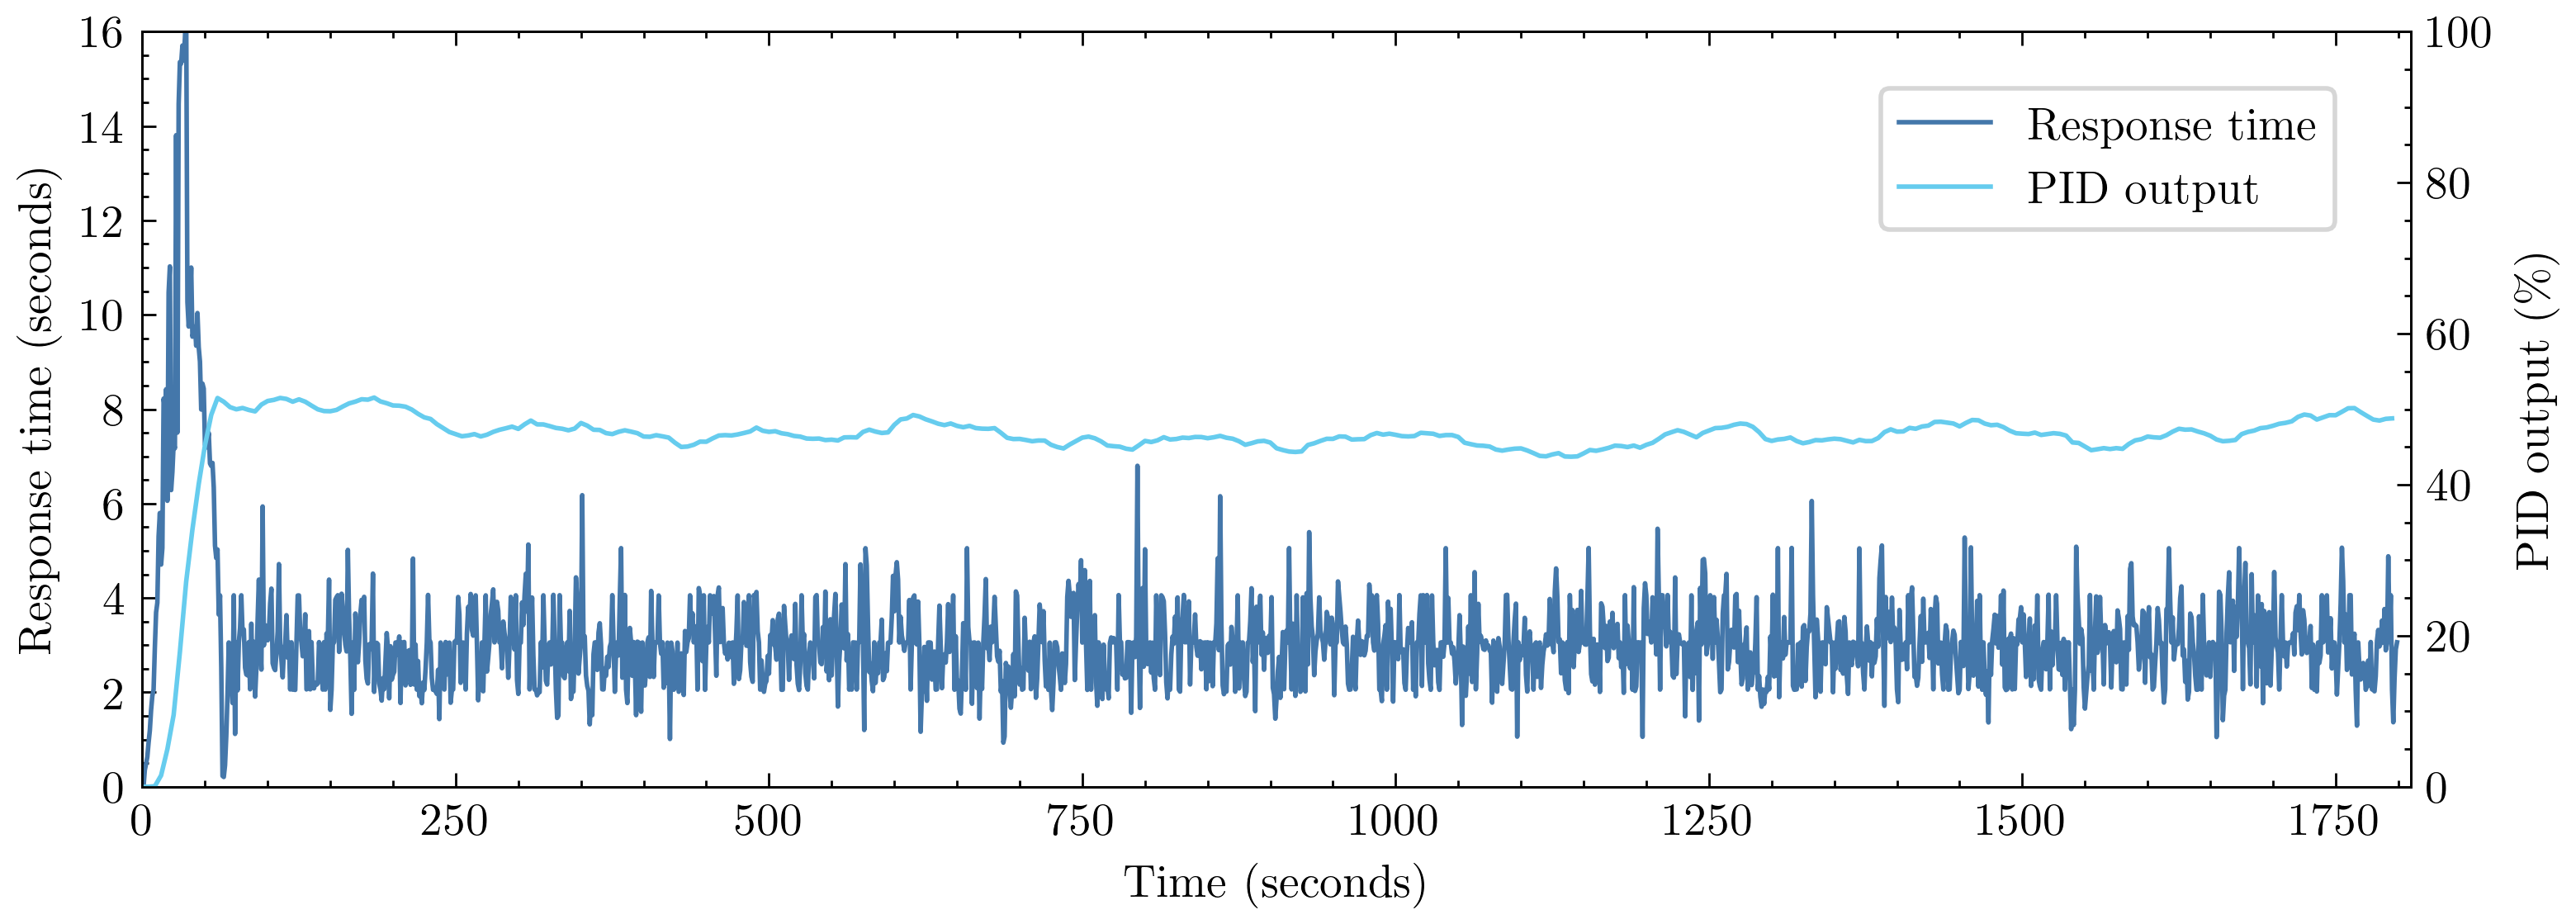

In [152]:
df_on_p95 = pd.read_csv("data/constant_load_p95_2021-05-10-12-14_chronograf_data.csv")[["_time", "_value"]]
df_on_p95["elapsed"] = (pd.to_datetime(df_on_p95["_time"].values) - pd.to_datetime(df_on_p95["_time"][0])).total_seconds()

df_on_pid = pd.read_csv("data/constant_load_pid_chronograf_data.csv")[["_time", "_value", "_measurement"]]
df_on_pid["elapsed"] = (pd.to_datetime(df_on_pid["_time"].values) - pd.to_datetime(df_on_pid["_time"][0])).total_seconds()
df_on_pid = df_on_pid[df_on_pid["_measurement"] == "dimmer_output"]

plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.dpi'] = 400

fig, ax1 = plt.subplots()

color = '#4477AA'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Response time (seconds)')
line1 = ax1.plot(df_on_p95["elapsed"].values, df_on_p95["_value"].values, color=color)
ax1.set_xlim([0, 1810])
ax1.set_ylim([0, 16])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#66CCEE'
ax2.set_ylabel('PID output (\%)')  # we already handled the x-label with ax1
line2 = ax2.plot(df_on_pid["elapsed"].values, df_on_pid["_value"].values, color=color)
ax2.set_ylim([0, 100])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(["Response time", "PID output"], frameon=True, loc='upper right', bbox_to_anchor=(0.905,0.9))
plt.savefig("../out/baseline_dimming_adaptive_control_dimmer_on.pdf")

### Constant Load, Dimmer Off

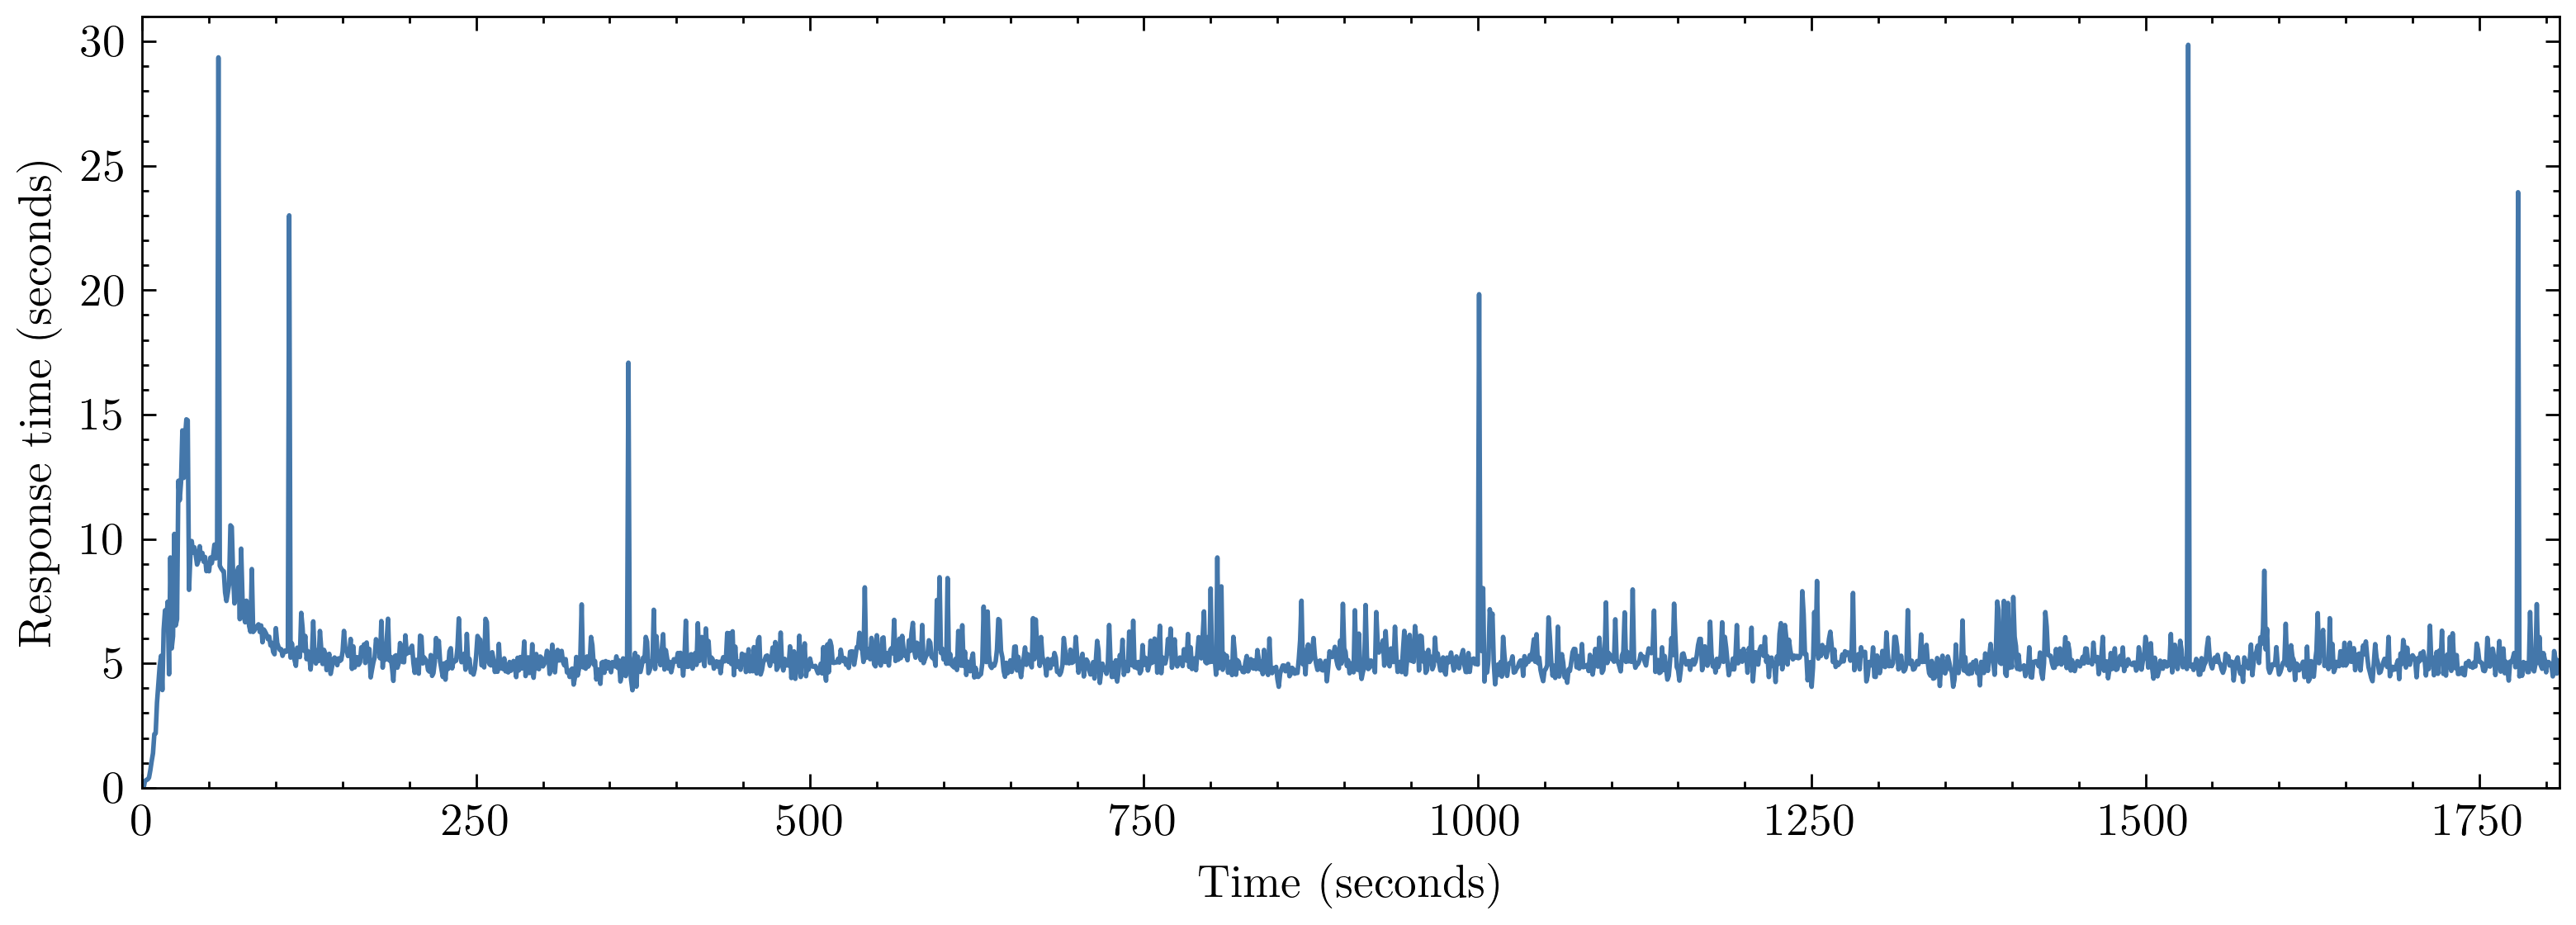

In [153]:
df_on_p95 = pd.read_csv("data/constant_load_disabled_p95_2021-05-13-17-04_chronograf_data.csv")[["_time", "_value"]]
df_on_p95["elapsed"] = (pd.to_datetime(df_on_p95["_time"].values) - pd.to_datetime(df_on_p95["_time"][0])).total_seconds()

plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.dpi'] = 400

fig, ax1 = plt.subplots()

color = '#4477AA'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Response time (seconds)')
line1 = ax1.plot(df_on_p95["elapsed"].values, df_on_p95["_value"].values, color=color)
ax1.set_xlim([0, 1810])
ax1.set_ylim([0, 31])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.legend(["Response time", "PID output"], frameon=True, loc='upper right', bbox_to_anchor=(0.905,0.9))
plt.savefig("../out/baseline_dimming_adaptive_control_dimmer_off.pdf")

### Flash Crowd, Dimmer On

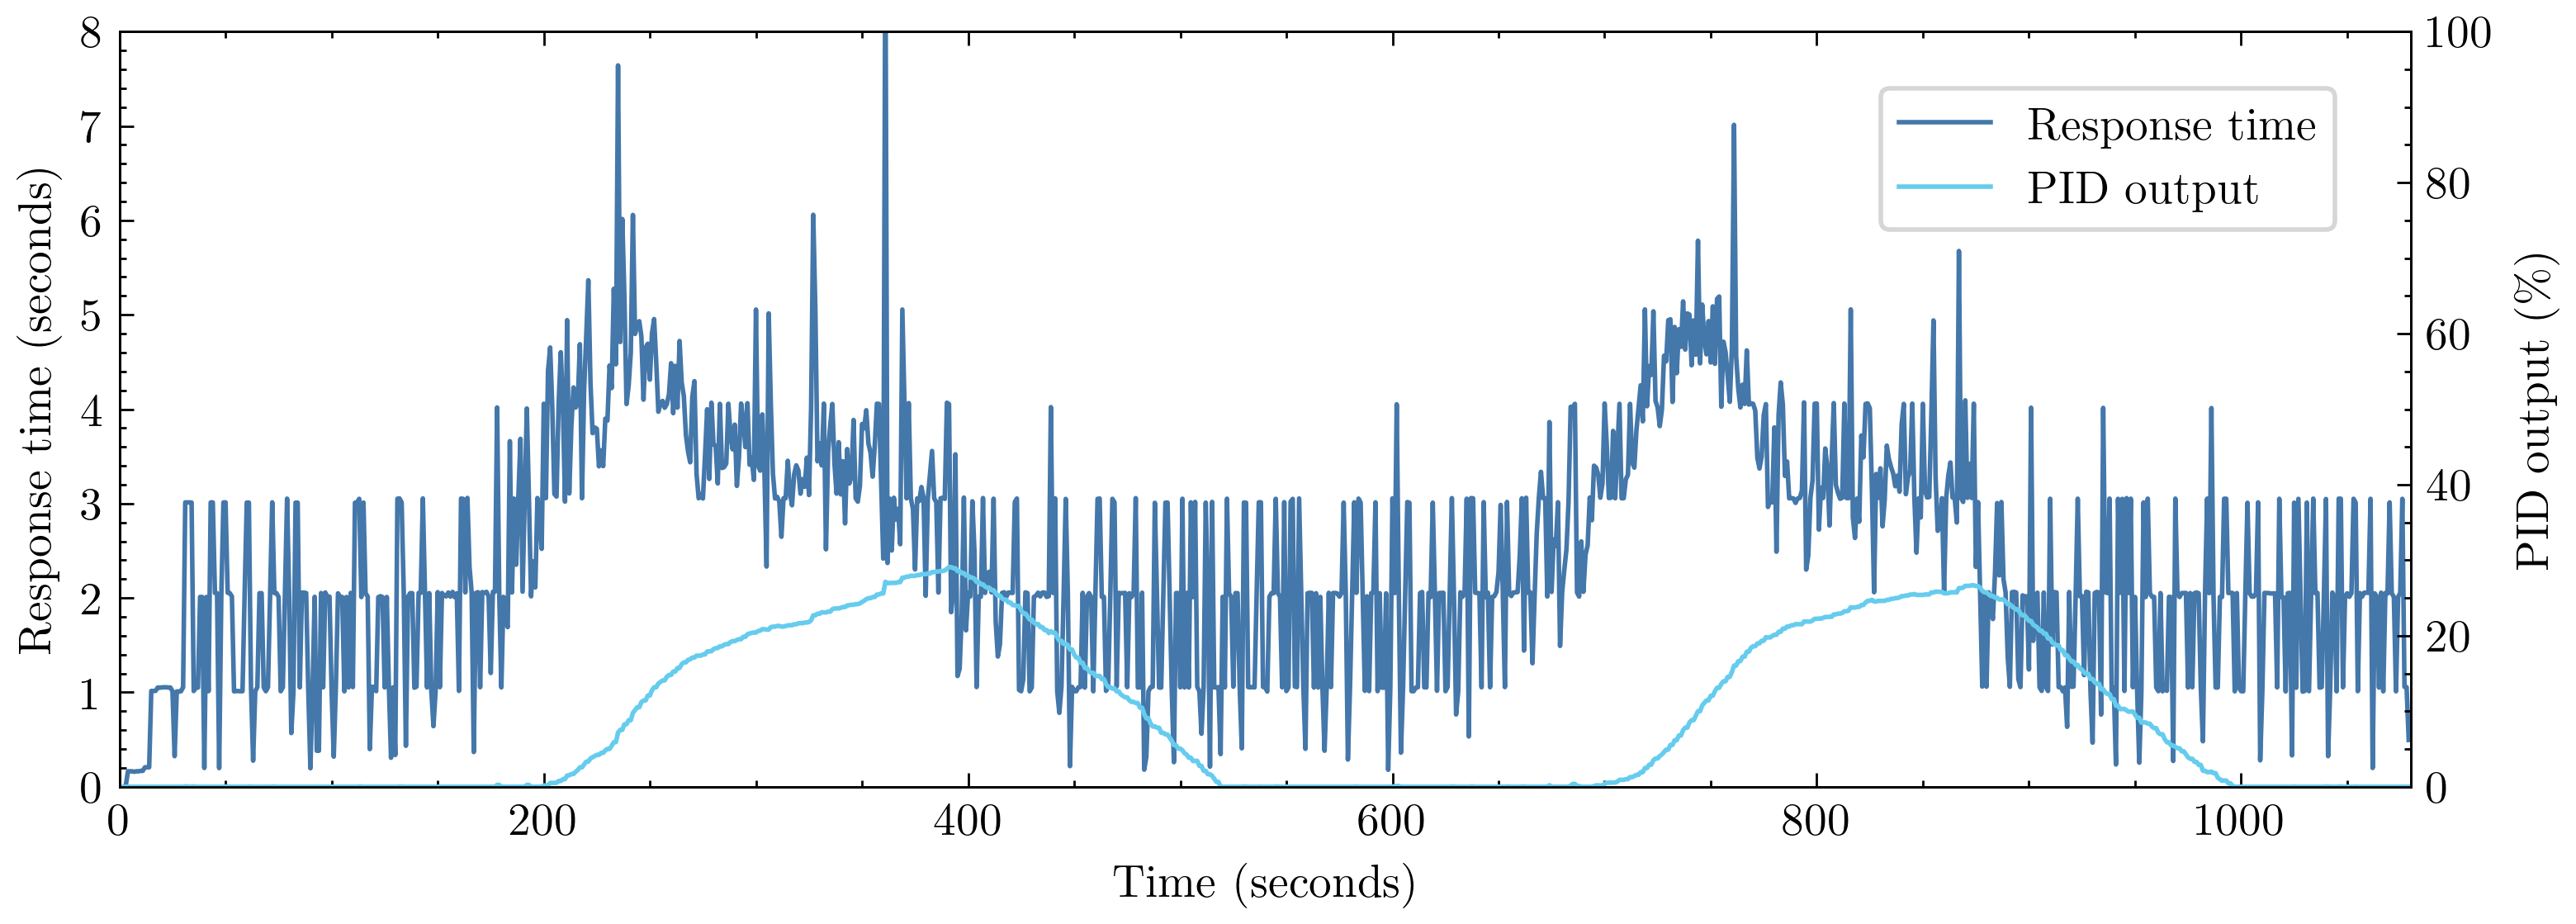

In [155]:
df_on_p95 = pd.read_csv("data/flash_crowd_2021-05-13-19-27_chronograf_data.csv")[["_time", "_value", "_field"]]
df_on_p95["elapsed"] = (pd.to_datetime(df_on_p95["_time"].values) - pd.to_datetime(df_on_p95["_time"][0])).total_seconds()
df_on_p95 = df_on_p95[df_on_p95["_field"] == "p95"]

df_on_pid = pd.read_csv("data/flash_crowd_2021-05-13-19-27_chronograf_data.csv")[["_time", "_value", "_measurement"]]
df_on_pid["elapsed"] = (pd.to_datetime(df_on_pid["_time"].values) - pd.to_datetime(df_on_pid["_time"][0])).total_seconds()
df_on_pid = df_on_pid[df_on_pid["_measurement"] == "dimmer_output"]

plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.dpi'] = 400

fig, ax1 = plt.subplots()

color = '#4477AA'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Response time (seconds)')
line1 = ax1.plot(df_on_p95["elapsed"].values, df_on_p95["_value"].values, color=color)
ax1.set_xlim([0, 1080])
ax1.set_ylim([0, 8])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#66CCEE'
ax2.set_ylabel('PID output (\%)')  # we already handled the x-label with ax1
line2 = ax2.plot(df_on_pid["elapsed"].values, df_on_pid["_value"].values, color=color)
ax2.set_ylim([0, 100])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(["Response time", "PID output"], frameon=True, loc='upper right', bbox_to_anchor=(0.905,0.9))
plt.savefig("../out/baseline_dimming_adaptive_control_flash_crowd_dimmer_on.pdf")